<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex02_4_Multiple_Regression_Fuel_Economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
carData = pd.read_csv('Ex02_4_carData.csv')

In [ ]:
# 'FuelEcon' is the target variable and the rest are features
X = carData.drop(columns=['FuelEcon'])
y = carData['FuelEcon']

In [ ]:
print(X.dtypes)

Car_Truck        object
EngDisp         float64
RatedHP           int64
Drive            object
Weight          float64
Comp            float64
AxleRatio       float64
EVSpeedRatio    float64
AC               object
PRP               int64
FuelType          int64
City_Highway     object
Valves_Cyl        int64
dtype: object


In [ ]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#[Optional: Test various models]
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.svm import SVR
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
#from sklearn.neighbors import KNeighborsRegressor

#model = DecisionTreeRegressor(random_state=42)
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
#model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

#kernel = C(1.0) * RBF(length_scale=1.0)
#model = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
def evaluate_fit(y_true, y_pred, name='Linear'):
    plt.figure(figsize=(12, 10))

    # 1. Plot against observation number
    plt.subplot(2, 2, 1)
    sorted_idx = np.argsort(y_true.values)
    y_true_sorted = y_true.values[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    plt.plot(y_true_sorted, '.', label='Actual (sorted)')
    plt.plot(y_pred_sorted, '.', label='Predicted (aligned)')
    plt.title(name + ' (sorted)')
    plt.xlabel('Sorted observation index')
    plt.ylabel('Fuel economy')
    plt.legend()

    # 2. Plot predicted vs actual
    plt.subplot(2, 2, 2)
    plt.scatter(y_true, y_pred, marker='.')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k:', label='45-degree line')
    plt.title(name)
    plt.xlabel('Actual fuel economy')
    plt.ylabel('Predicted fuel economy')
    plt.legend()

    # 3. Distribution of errors
    plt.subplot(2, 2, 3)
    err = y_true.values - y_pred
    mse = mean_squared_error(y_true, y_pred)
    plt.hist(err, bins=20)
    plt.title(f'MSE = {mse:.4f}')
    plt.xlabel('Prediction error')

    # 4. Distribution of percentage errors
    plt.subplot(2, 2, 4)
    percentage_err = 100 * err / y_true.values
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    plt.hist(percentage_err, bins=20)
    plt.title(f'MAPE = {mape:.4f}%')
    plt.xlabel('Prediction percentage error')

    plt.tight_layout()
    plt.show()

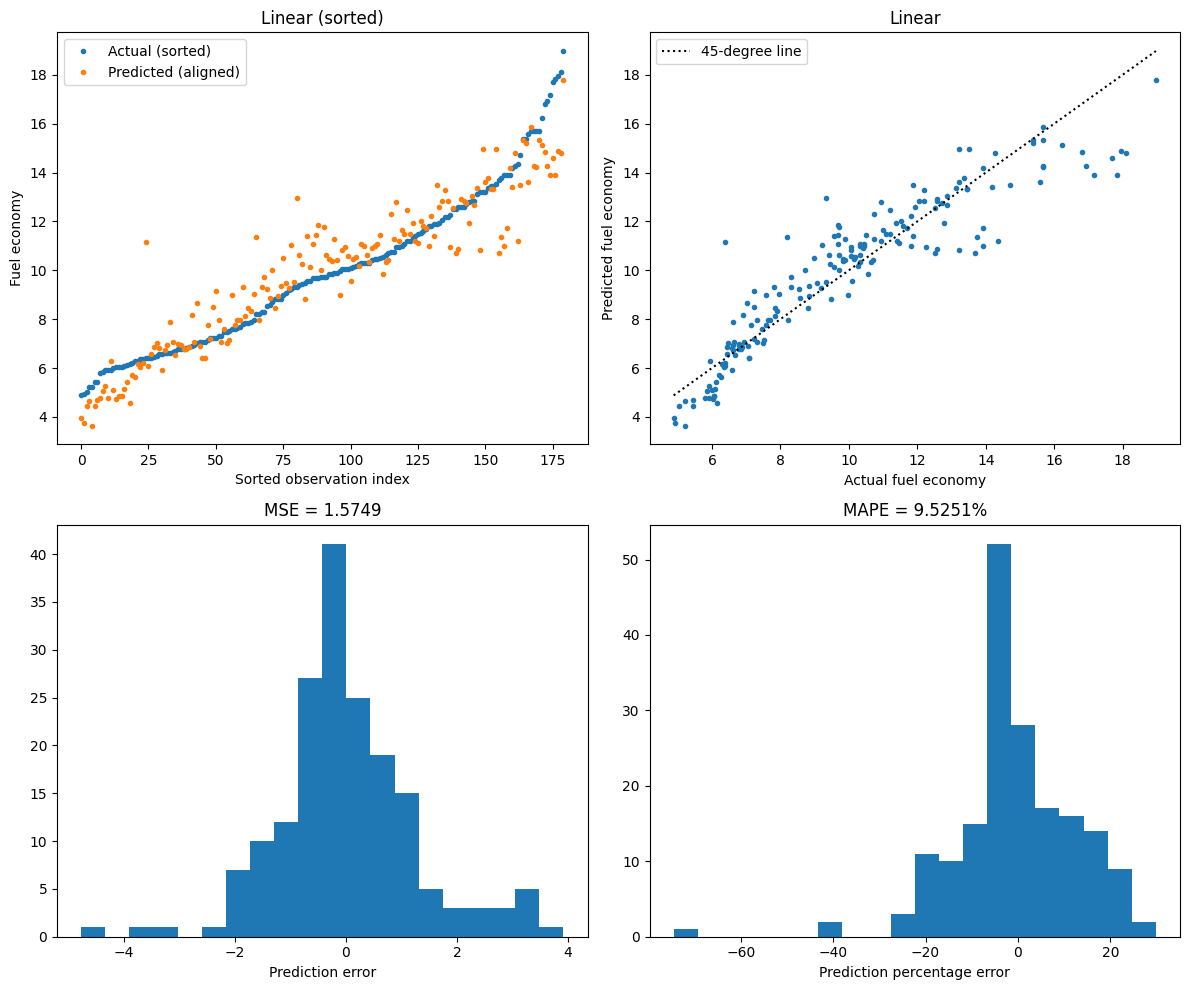

In [ ]:
# Call evaluation
evaluate_fit(y_test, y_pred, 'Linear')